In [1]:
import keras
import numpy as np
from PIL import Image

In [2]:
model = keras.models.load_model('best-model.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49)             │         6,321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,560,440 (17.40 MB)

 Trainable params: 170,289 (665.19 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 340,580 (1.30 MB)

In [3]:
categories = np.load("category.npy")
categories

array(['aircraft carrier', 'airplane', 'alarm clock', 'ambulance',
       'angel', 'animal migration', 'ant', 'anvil', 'apple', 'arm',
       'asparagus', 'axe', 'backpack', 'banana', 'barn', 'baseball bat',
       'baseball', 'basket', 'basketball', 'bat', 'bathtub', 'beach',
       'bear', 'beard', 'bed', 'bee', 'belt', 'bench', 'bicycle',
       'binoculars', 'bird', 'birthday cake', 'blackberry', 'blueberry',
       'book', 'boomerang', 'bottlecap', 'bowtie', 'bracelet', 'brain',
       'bread', 'bridge', 'broccoli', 'broom', 'bucket', 'bulldozer',
       'The Eiffel Tower', 'The Great Wall of China', 'The Mona Lisa'],
      dtype='<U23')

In [4]:
image = np.invert(np.array(Image.open("sample.jpg").resize((224, 224))))
image  # 픽셀값 반전 (255 <-> 0)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

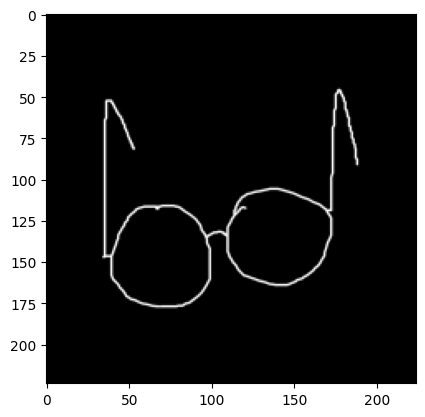

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [6]:
predictions = model.predict(image[np.newaxis, :, :, :])[0]
print(np.round(predictions, decimals=3))

indexes = np.argsort(predictions).tolist()
indexes.reverse()
indexes = indexes[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0.002 0.001 0.    0.    0.001 0.009 0.    0.    0.    0.    0.    0.001
 0.01  0.    0.01  0.001 0.006 0.003 0.001 0.017 0.    0.    0.    0.004
 0.001 0.    0.    0.001 0.005 0.005 0.005 0.    0.    0.    0.003 0.085
 0.    0.625 0.    0.    0.014 0.179 0.    0.    0.    0.    0.    0.008
 0.001]


In [7]:
indexes

[37, 41, 35, 19, 40]

In [8]:
items = np.column_stack((categories[indexes], predictions[indexes]))
items

array([['bowtie', '0.6248597'],
       ['bridge', '0.1788677'],
       ['boomerang', '0.08477634'],
       ['bat', '0.016660968'],
       ['bread', '0.013997267']], dtype='<U32')